In [450]:
import numpy as np 
import pandas as pd 
import math
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from sklearn.model_selection import RandomizedSearchCV

In [451]:
df= pd.read_csv(r'D:/WQD7005 Group Project/Data.csv')

In [452]:
#Check on the data shape
df.shape

(8523, 12)

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [454]:
df.columns.unique()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [455]:
#Check for unique values in each column
print(df['Item_Fat_Content'].unique())
print(df['Item_Type'].unique())
print(df['Outlet_Establishment_Year'].sort_values().unique())
print(df['Outlet_Size'].unique())
print(df['Outlet_Location_Type'].unique())
print(df['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
[1985 1987 1997 1998 1999 2002 2004 2007 2009]
['Medium' nan 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [456]:
#As displayed, there are some repeated unique column with different label in Item Fat Content, thus we will standardized the label.\
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg', 'Regular')

In [457]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [458]:
#Find out the continuos variables and their mathematical value.
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [459]:
#Check for duplicate values
df.duplicated().sum()

0

In [460]:
#Drop unused column
df= df.drop(columns=['Item_Identifier'])

In [461]:
#Check for null values
df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

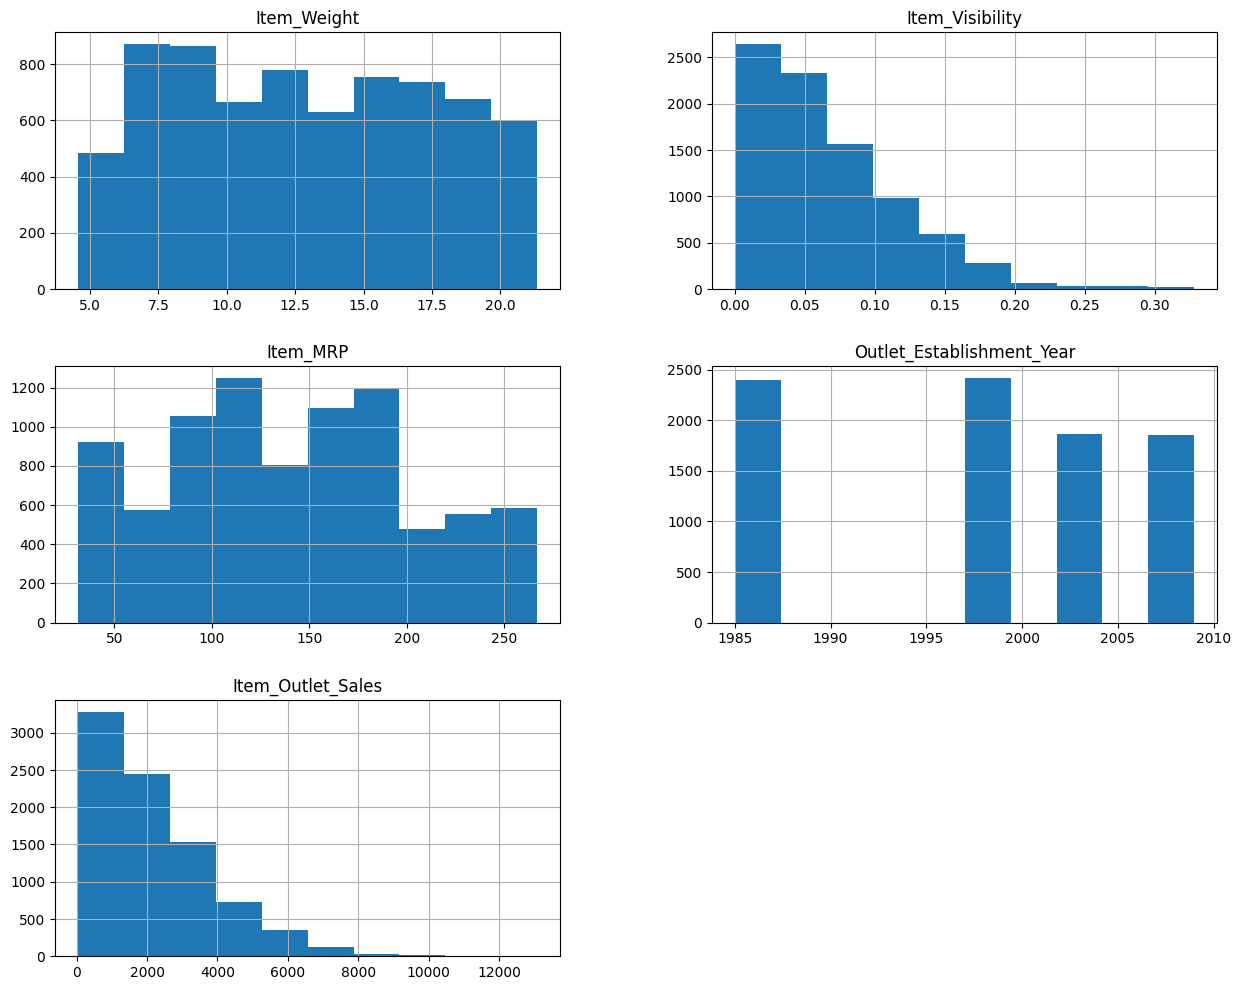

In [462]:
#To check the distribution of the data by plotting the histogram.
df.hist(figsize=(15,12))

In [463]:
#Impute for the missing value.
#As seen in the histogram, the distribution of the Item_Weight is considered as uniform distribution.
#Thus, it will be imputed using the mode.
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
df.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [464]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

EXPLORATORY DATA ANALYSIS (EDA)

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

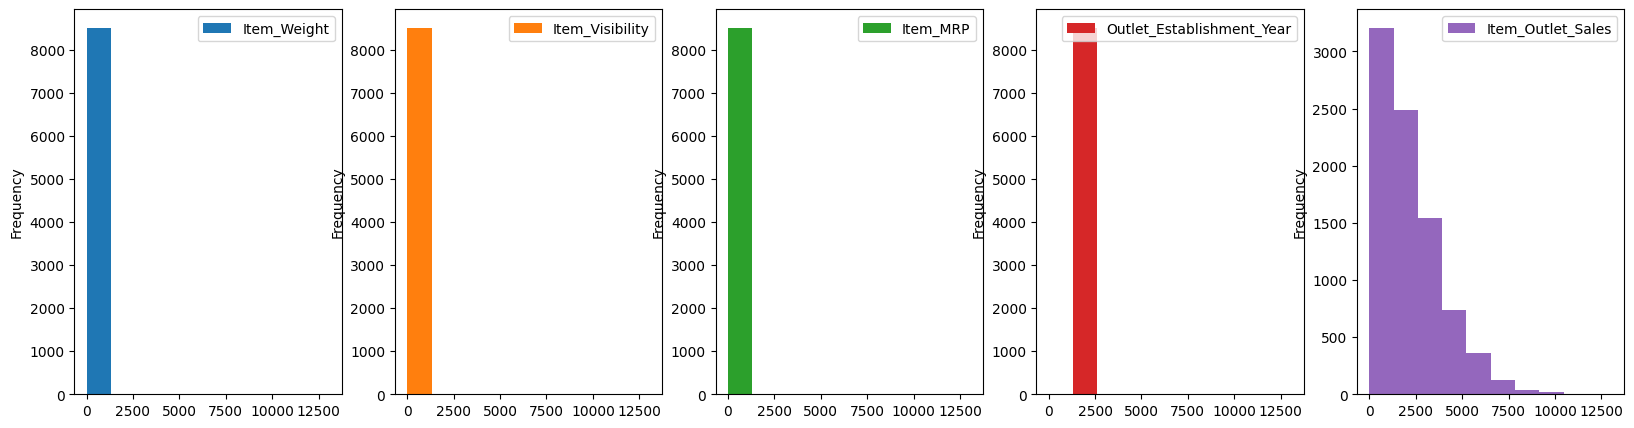

In [465]:
#Univariate Analysis (Categorical Variable)
df.plot(kind='hist', subplots=True, layout=(1,5), figsize=(20,5))

<Axes: >

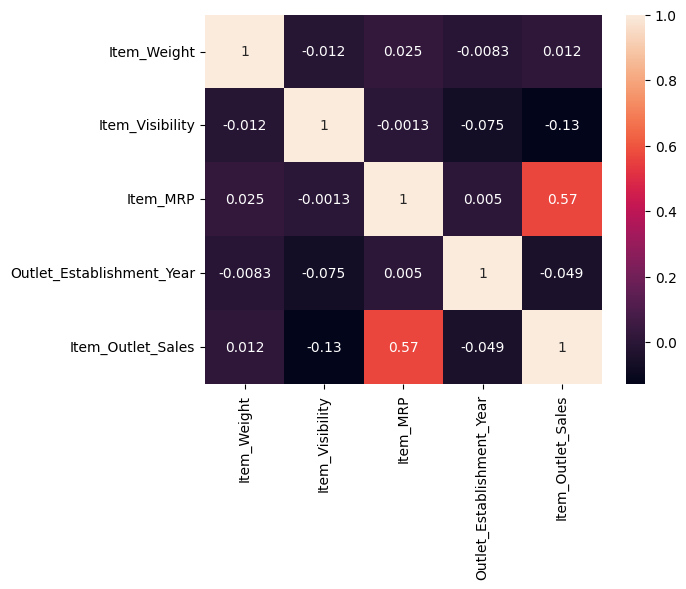

In [466]:
#Bivariate Analysis
#Correlation Heatmap for numerical variable only
df_corr= df.drop(columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])
import seaborn as sns
df_corr=df_corr.corr()
sns.heatmap(df_corr, annot=True)

Visualizing Quantitative Data Spread W.R.T  Item_Outlet_Sales


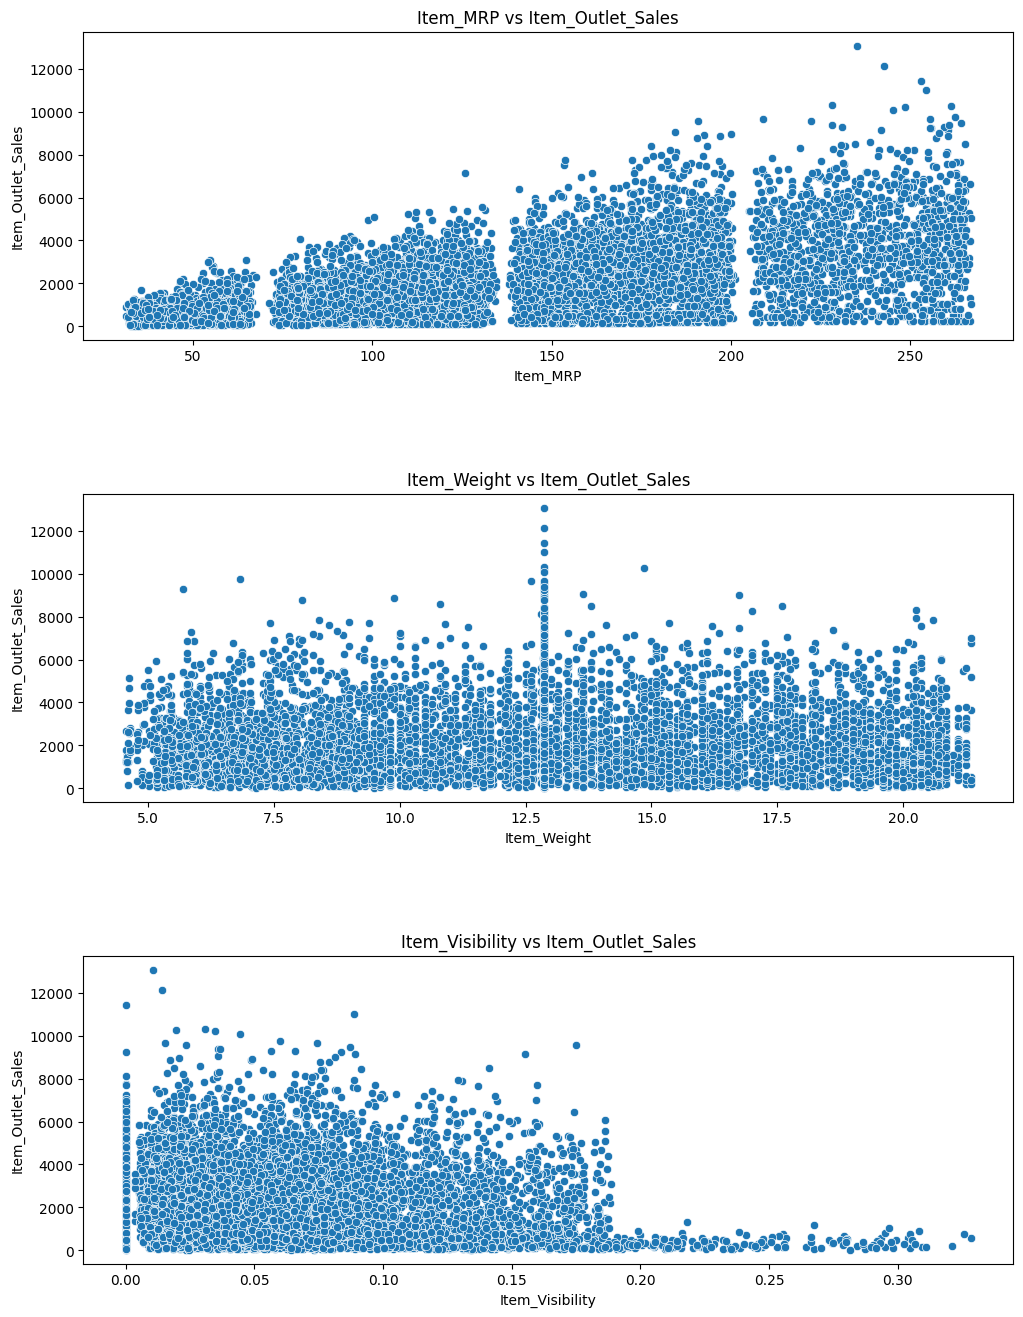

In [467]:
#Bivariate Analysis
#Scatterplot
fig, axes = plt.subplots(3, 1, figsize=(12,16))
Y_Variables="Item_Outlet_Sales"
X_Variables = ["Item_MRP", "Item_Weight", "Item_Visibility",]
print(f"Visualizing Quantitative Data Spread W.R.T  {Y_Variables}")
for i, label in enumerate(X_Variables):
    ax = sns.scatterplot(data=df, x=label, y=Y_Variables, ax=axes[i])
    ax.set_xlabel(label)
    ax.set_ylabel(f"{Y_Variables}")
    ax.set_title(f"{label} vs {Y_Variables}")
plt.subplots_adjust(hspace=0.5)

plt.show()

Boxplot in order to check on the outliers


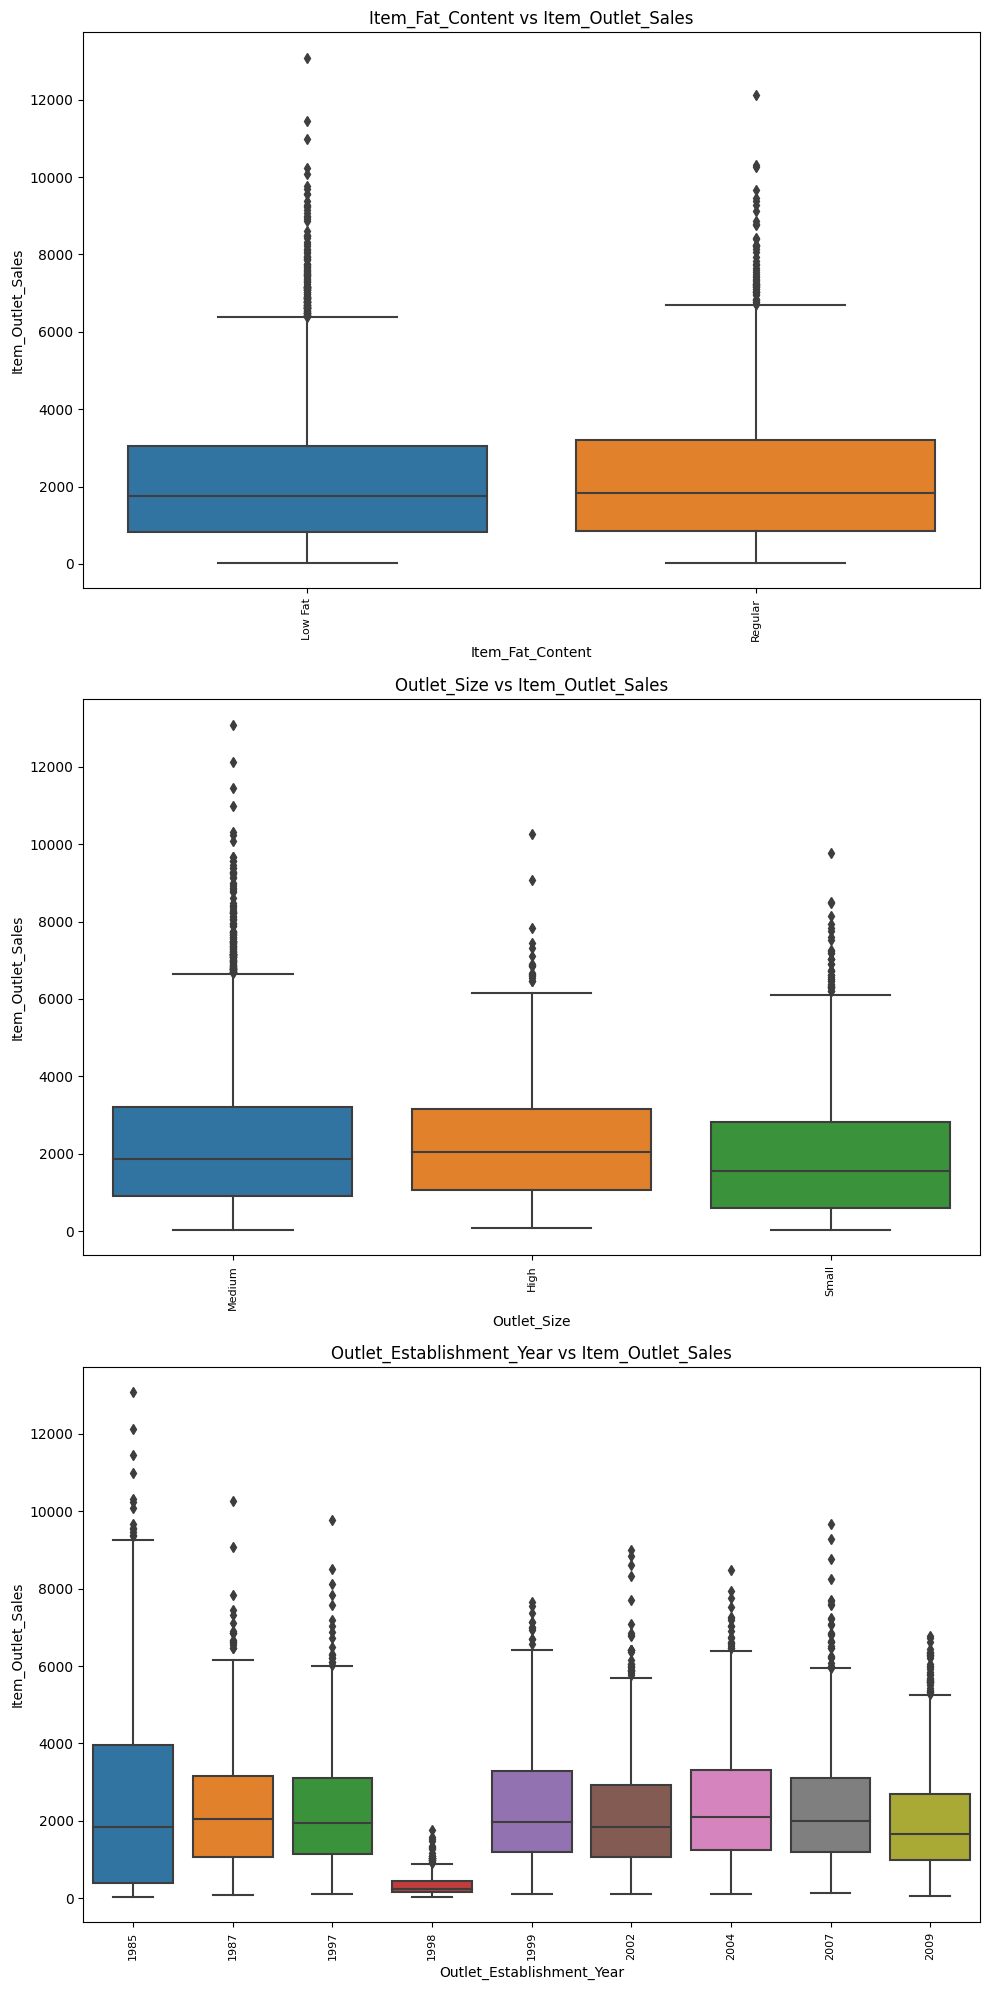

In [468]:
#Boxplot to check the outliers
fig, axes = plt.subplots(3, 1, figsize=(10, 20))
target="Item_Outlet_Sales"
columns = ["Item_Fat_Content", "Outlet_Size", "Outlet_Establishment_Year"]
print(f"Boxplot in order to check on the outliers")
for i, label in enumerate(columns):
    ax = sns.boxplot(data=df, x=label, y=target, ax=axes[i])
    ax.set_xlabel(label)
    ax.set_ylabel(f"{target}")
    ax.set_title(f"{label} vs {target}")
    ax.tick_params(axis='x',rotation=90, labelsize=8)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

DATA TRANSFORMATION

In [469]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [470]:
#Encode the categorical feature
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=le.fit_transform(df['Item_Type'])
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Establishment_Year']=le.fit_transform(df['Outlet_Establishment_Year'])
df['Outlet_Establishment_Year']=le.fit_transform(df['Outlet_Establishment_Year'])



DATA MODELLING

In [471]:
Y = df['Item_Outlet_Sales']
X = df.drop(['Item_Outlet_Sales'], axis = 1)

In [474]:
#Data Scaling
standard_scaler = StandardScaler()
df['Item_Weight'] = standard_scaler.fit_transform(np.array(df['Item_Weight']).reshape(-1,1))
df['Item_Visibility'] = standard_scaler.fit_transform(np.array(df['Item_Visibility']).reshape(-1,1))
df['Item_Type']=standard_scaler.fit_transform(np.array(df['Item_Type']).reshape(-1,1))
df['Item_MRP']=standard_scaler.fit_transform(np.array(df['Item_MRP']).reshape(-1,1))
df['Outlet_Establishment_Year']=standard_scaler.fit_transform(np.array(df['Outlet_Establishment_Year']).reshape(-1,1))
df['Item_Outlet_Sales']=standard_scaler.fit_transform(np.array(df['Item_Outlet_Sales']).reshape(-1,1))
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.841872,0,-0.970732,-0.766479,1.747454,9,0.076668,1,0,1,0.910601
1,-1.641706,1,-0.908111,1.608963,-1.489023,3,1.541783,1,2,2,-1.018440
2,1.098554,0,-0.956917,0.658786,0.010040,9,0.076668,1,0,1,-0.049238
3,1.500838,1,-1.281758,-0.291391,0.660050,0,-0.289611,1,2,0,-0.849103
4,-0.929428,0,-1.281758,0.421242,-1.399220,1,-1.022168,0,2,1,-0.695373


Results for Train-Test Split Ratio in Linear Regression 0.7:
Testing data_mae: 872.3847380748592
Testing Data_R2 score: 0.5127600579901508
Testing Data_RMSE: 1168.2276849319862
The best parameters: {'fit_intercept': True}



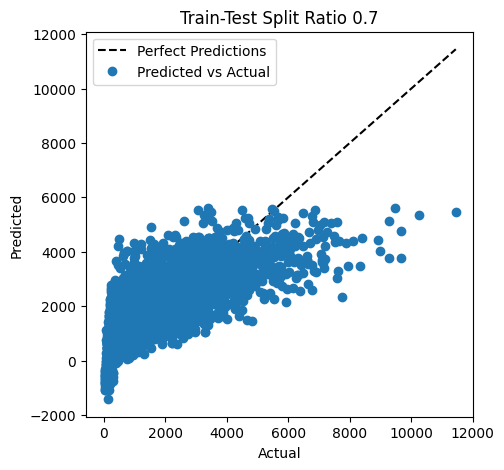

Results for Train-Test Split Ratio in Linear Regression 0.8:
Testing data_mae: 854.8800698231327
Testing Data_R2 score: 0.5248292389664975
Testing Data_RMSE: 1136.4417737044637
The best parameters: {'fit_intercept': True}



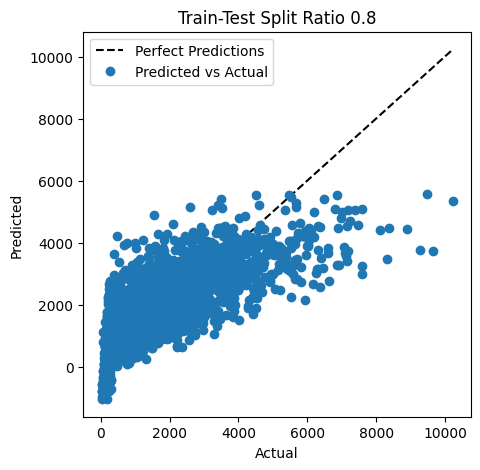

Results for Train-Test Split Ratio in Linear Regression 0.9:
Testing data_mae: 853.450146029863
Testing Data_R2 score: 0.5317546618058604
Testing Data_RMSE: 1144.1790455739822
The best parameters: {'fit_intercept': True}



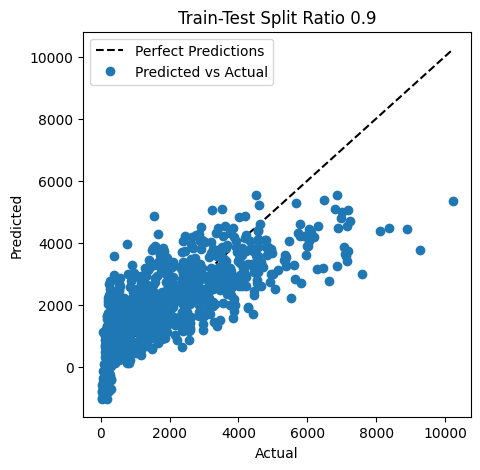

In [492]:
#Let's try without perform scaling first.
#Linear Regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def predict_sales_LR(df, X, Y):
    results = {}
    
    for split_ratio in [0.7, 0.8, 0.9]:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1-split_ratio, random_state=42)
        #Utilizing GridsearchCV for the best hypertuning parameters
        parameters = {'fit_intercept': [True, False]}
        grid_search = GridSearchCV(LinearRegression(), parameters, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        
        best_model_LR = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_model_LR.fit(X_train, y_train)
        
        y_pred = best_model_LR.predict(X_test)
        
        
        mse_test = mean_squared_error(y_test, y_pred)  
        mae_test= mean_absolute_error(y_test , y_pred) 
        rmse_test = np.sqrt(mse_test)  
        reg_score_test = r2_score(y_test , y_pred)   
        
        results[f'Train-Test Split {split_ratio}'] = {
            'Model': best_model_LR,
            'Testing data_mae': mae_test,
            "Testing Data_R2 score" : reg_score_test,
            'Testing Data_RMSE': rmse_test,
            'Best Parameters- fit': best_params,
        
        }
        
        print(f"Results for Train-Test Split Ratio in Linear Regression {split_ratio}:")
        print(f"Testing data_mae: {mae_test}")
        print(f"Testing Data_R2 score: {reg_score_test}")
        print(f"Testing Data_RMSE: {rmse_test}")
        print(f"The best parameters: {best_params}")
        print()
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(111)
        ax.errorbar(y_test, y_pred, fmt='o', label='Predicted vs Actual')
        max_val = max(y_test.max(), y_pred.max())  # finding maximum value to set limit
        ax.plot([0, max_val], [0, max_val], 'k--', label='Perfect Predictions')
        ax.set_xlabel('Actual')
        ax.set_ylabel('Predicted')
        ax.legend()
        plt.title(f'Train-Test Split Ratio {split_ratio}')
        plt.show()
    
    return results
    
   
results = predict_sales_LR(df, X, Y)



Results for Train-Test Split Ratio in Ridge Regression 0.7:
Testing data_mae: 872.1822088101148
Testing Data_R2 score: 0.5129368187032327
Testing Data_RMSE: 1168.015761121533
The best parameters: {'alpha': 1}



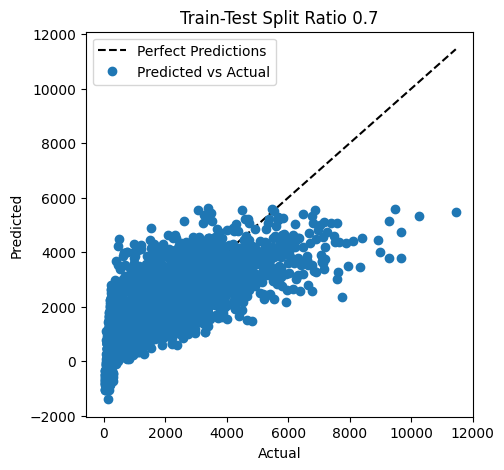

Results for Train-Test Split Ratio in Ridge Regression 0.8:
Testing data_mae: 854.7416418910567
Testing Data_R2 score: 0.5249576858602696
Testing Data_RMSE: 1136.288163367077
The best parameters: {'alpha': 1}



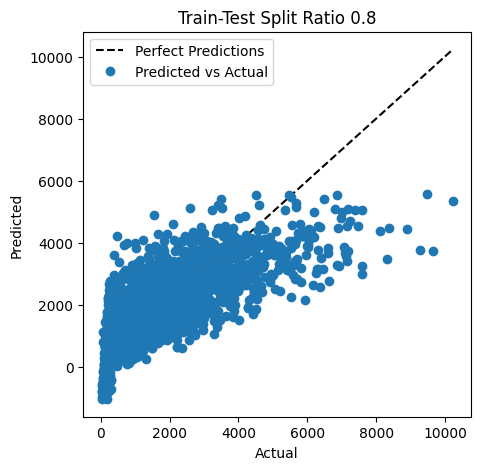

Results for Train-Test Split Ratio in Ridge Regression 0.9:
Testing data_mae: 853.3735140427539
Testing Data_R2 score: 0.5317902083279892
Testing Data_RMSE: 1144.1356149678838
The best parameters: {'alpha': 1}



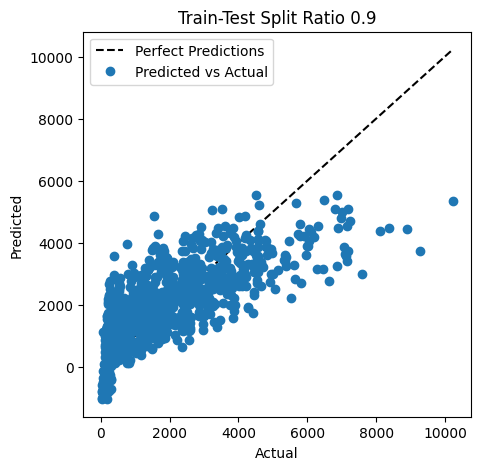

In [497]:
#Let's try without perform scaling first.
#Ridge Regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
def predict_sales_RR(df, X, Y):
    results = {}
    
    for split_ratio in [0.7, 0.8, 0.9]:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1-split_ratio, random_state=42)
        #Utilizing GridsearchCV for the best hypertuning parameters
        param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

        ridge_reg = Ridge()

        grid_search_RR = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search_RR.fit(X_train, y_train)
        
        best_model_RR = grid_search_RR.best_estimator_
        best_params_RR = grid_search_RR.best_params_
        best_model_RR.fit(X_train, y_train)
        
        y_pred_RR = best_model_RR.predict(X_test)
        
        
        mse_test_RR = mean_squared_error(y_test, y_pred_RR)  
        mae_test_RR= mean_absolute_error(y_test , y_pred_RR) 
        rmse_test_RR = np.sqrt(mse_test_RR)  
        reg_score_test_RR = r2_score(y_test , y_pred_RR)   
        
        results[f'Train-Test Split {split_ratio}'] = {
            'Model': best_model_RR,
            'Testing data_mae': mae_test_RR,
            "Testing Data_R2 score" : reg_score_test_RR,
            'Testing Data_RMSE': rmse_test_RR,
            'Best Parameters- fit': best_params_RR,
        
        }
        
        print(f"Results for Train-Test Split Ratio in Ridge Regression {split_ratio}:")
        print(f"Testing data_mae: {mae_test_RR}")
        print(f"Testing Data_R2 score: {reg_score_test_RR}")
        print(f"Testing Data_RMSE: {rmse_test_RR}")
        print(f"The best parameters: {best_params_RR}")
        print()
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(111)
        ax.errorbar(y_test, y_pred_RR, fmt='o', label='Predicted vs Actual')
        max_val = max(y_test.max(), y_pred_RR.max())  # finding maximum value to set limit
        ax.plot([0, max_val], [0, max_val], 'k--', label='Perfect Predictions')
        ax.set_xlabel('Actual')
        ax.set_ylabel('Predicted')
        ax.legend()
        plt.title(f'Train-Test Split Ratio {split_ratio}')
        plt.show()
    
    return results
    
   
results = predict_sales_RR(df, X, Y)

Results for Train-Test Split Ratio in Ridge Regression 0.7:
Testing data_mae: 737.3431438306174
Testing Data_R2 score: 0.6002864178232782
Testing Data_RMSE: 1058.10923655143
The best parameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}



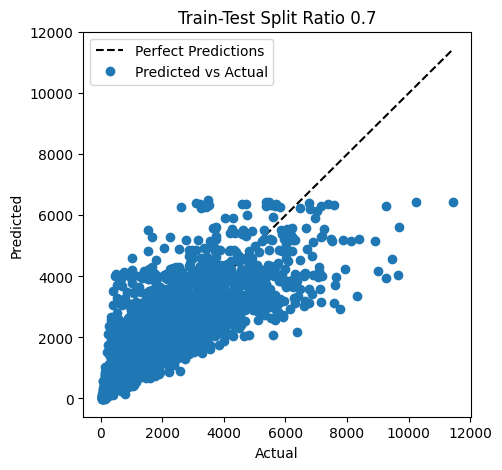

Results for Train-Test Split Ratio in Ridge Regression 0.8:
Testing data_mae: 717.6077894550617
Testing Data_R2 score: 0.6112887016287796
Testing Data_RMSE: 1027.8646182881764
The best parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}



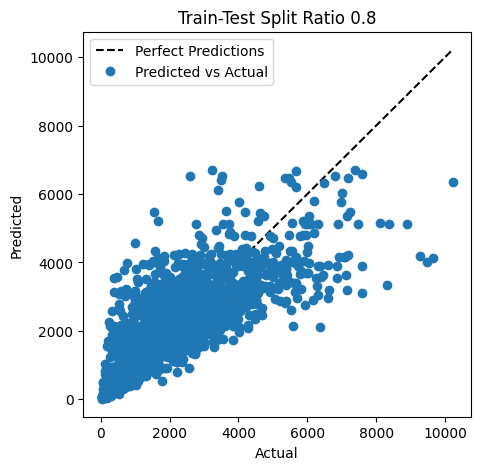

Results for Train-Test Split Ratio in Ridge Regression 0.9:
Testing data_mae: 722.7795560495446
Testing Data_R2 score: 0.6224262955647117
Testing Data_RMSE: 1027.443926274297
The best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}



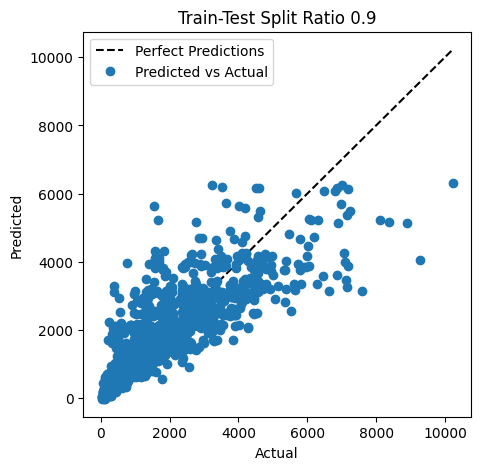

In [502]:
#LXGBoost
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
def predict_sales_XGB(df, X, Y):
    results = {}
    
    for split_ratio in [0.7, 0.8, 0.9]:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1-split_ratio, random_state=42)
        #Utilizing GridsearchCV for the best hypertuning parameters
        param_grid_XGB = {
        'n_estimators': [100, 200, 300],  # Number of trees in the forest
        'learning_rate': [0.01, 0.1, 0.3],  # Learning rate
        'max_depth': [3, 5, 7],  # Maximum depth of each tree
        'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instance
        'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
        'gamma': [0, 0.1, 0.3]  # Minimum loss reduction required to make a further partition on a leaf node of the tree
    }

        xgb_reg = XGBRegressor()

        grid_search_XGB = GridSearchCV(xgb_reg, param_grid_XGB, cv=5, scoring='neg_mean_squared_error')
        grid_search_XGB.fit(X_train, y_train)
        
        best_model_XGB = grid_search_XGB.best_estimator_
        best_params_XGB = grid_search_XGB.best_params_
        best_model_XGB.fit(X_train, y_train)
        
        y_pred_XGB = best_model_XGB.predict(X_test)
        
        
        mse_test_XGB = mean_squared_error(y_test, y_pred_XGB)  
        mae_test_XGB= mean_absolute_error(y_test , y_pred_XGB) 
        rmse_test_XGB = np.sqrt(mse_test_XGB)   
        reg_score_test_XGB = r2_score(y_test , y_pred_XGB)   
        
        results[f'Train-Test Split {split_ratio}'] = {
            'Model': best_model_XGB,
            'Testing data_mae': mae_test_XGB,
            "Testing Data_R2 score" : reg_score_test_XGB,
            'Testing Data_RMSE': rmse_test_XGB,
            'Best Parameters': best_params_XGB,
        
        }
        
        print(f"Results for Train-Test Split Ratio in Ridge Regression {split_ratio}:")
        print(f"Testing data_mae: {mae_test_XGB}")
        print(f"Testing Data_R2 score: {reg_score_test_XGB}")
        print(f"Testing Data_RMSE: {rmse_test_XGB}")
        print(f"The best parameters: {best_params_XGB}")
        print()
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(111)
        ax.errorbar(y_test, y_pred_XGB, fmt='o', label='Predicted vs Actual')
        max_val = max(y_test.max(), y_pred_XGB.max())  # finding maximum value to set limit
        ax.plot([0, max_val], [0, max_val], 'k--', label='Perfect Predictions')
        ax.set_xlabel('Actual')
        ax.set_ylabel('Predicted')
        ax.legend()
        plt.title(f'Train-Test Split Ratio {split_ratio}')
        plt.show()
    
    return results
    
   
results = predict_sales_XGB(df, X, Y)

Results for Train-Test Split Ratio in Random Forest 0.7:
Testing data_mae: 744.0215763019532
Testing Data_R2 score: 0.597948507325559
Testing Data_RMSE: 1061.199146554082
The best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}



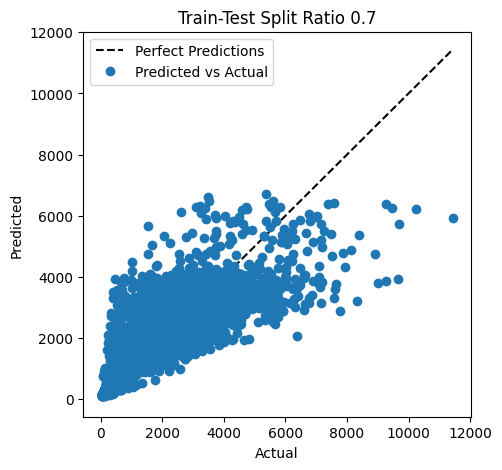

Results for Train-Test Split Ratio in Random Forest 0.8:
Testing data_mae: 719.7866669087957
Testing Data_R2 score: 0.6143245455127051
Testing Data_RMSE: 1023.8429277605367
The best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}



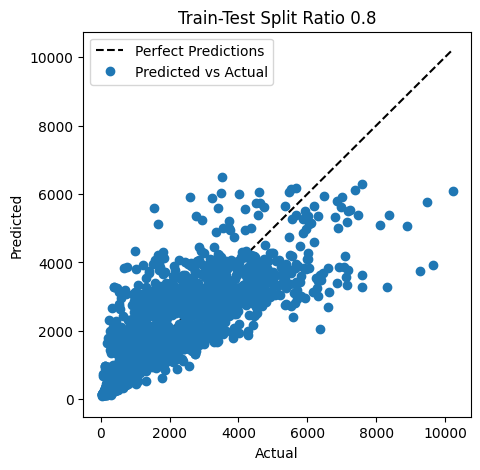

Results for Train-Test Split Ratio in Random Forest 0.9:
Testing data_mae: 720.9820044380749
Testing Data_R2 score: 0.6182438946173496
Testing Data_RMSE: 1033.1187757607456
The best parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}



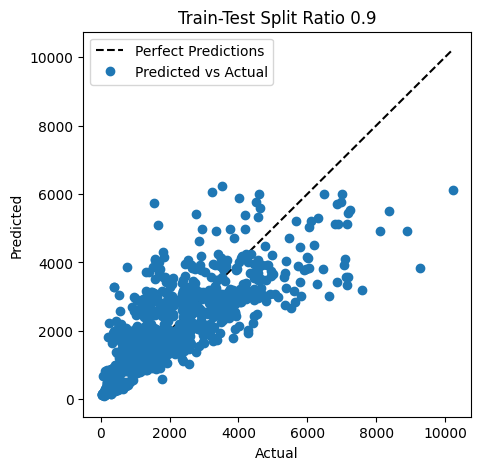

In [504]:
#Random Forest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
def predict_sales_RF(df, X, Y):
    results = {}
    
    for split_ratio in [0.7, 0.8, 0.9]:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1-split_ratio, random_state=42)
        #Utilizing GridsearchCV for the best hypertuning parameters
        param_grid_RF = {
        'n_estimators': [100, 200, 300],  # Number of trees in the forest
        'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
        'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
    }

        rf_reg = RandomForestRegressor()

        grid_search_RF = GridSearchCV(rf_reg, param_grid_RF, cv=5, scoring='neg_mean_squared_error')
        grid_search_RF.fit(X_train, y_train)
        
        best_model_RF = grid_search_RF.best_estimator_
        best_params_RF = grid_search_RF.best_params_
        best_model_RF.fit(X_train, y_train)
        
        y_pred_RF = best_model_RF.predict(X_test)
        
        
        mse_test_RF = mean_squared_error(y_test, y_pred_RF)  
        mae_test_RF= mean_absolute_error(y_test , y_pred_RF) 
        rmse_test_RF = np.sqrt(mse_test_RF)   
        reg_score_test_RF = r2_score(y_test , y_pred_RF) 
        results[f'Train-Test Split {split_ratio}'] = {
            'Model': best_model_RF,
            'Testing data_mae': mae_test_RF,
            "Testing Data_R2 score" : reg_score_test_RF,
            'Testing Data_RMSE': rmse_test_RF,
            'Best Parameters': best_params_RF,
        
        }
        
        print(f"Results for Train-Test Split Ratio in Random Forest {split_ratio}:")
        print(f"Testing data_mae: {mae_test_RF}")
        print(f"Testing Data_R2 score: {reg_score_test_RF}")
        print(f"Testing Data_RMSE: {rmse_test_RF}")
        print(f"The best parameters: {best_params_RF}")
        print()
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(111)
        ax.errorbar(y_test, y_pred_RF, fmt='o', label='Predicted vs Actual')
        max_val = max(y_test.max(), y_pred_RF.max())  # finding maximum value to set limit
        ax.plot([0, max_val], [0, max_val], 'k--', label='Perfect Predictions')
        ax.set_xlabel('Actual')
        ax.set_ylabel('Predicted')
        ax.legend()
        plt.title(f'Train-Test Split Ratio {split_ratio}')
        plt.show()
    
    return results
results = predict_sales_RF(df, X, Y)